<a href="https://colab.research.google.com/github/t00199360/ProblemSet1/blob/master/Spotify_artist_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objectives: <br>
Discover any correlations between the popularity of a song and its other attributes <br>
How do these attributes affect the popularity (strong, weak, positive or negative correlations etc.) <br> 
Can a correlation be drawn between different artists?

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np 
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 
import io

from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings # http://blog.johnmuellerbooks.com/2015/11/30/warnings-in-python-and-anaconda/
warnings.filterwarnings("ignore")

Importing the files through file explorer

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data_o.csv to data_o.csv


In [4]:
artist_data = files.upload()

Saving data_by_artist_o.csv to data_by_artist_o.csv


In [5]:
df_artist = pd.read_csv(io.BytesIO(artist_data['data_by_artist_o.csv']))

In [8]:
df_artist.head(5)

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [7]:
%load_ext google.colab.data_table

In [9]:
df = pd.read_csv(io.BytesIO(uploaded['data_o.csv']))
#this stores the csv in a pandas df
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


Text(0.5, 1.0, 'How popular a song is based on danceability')

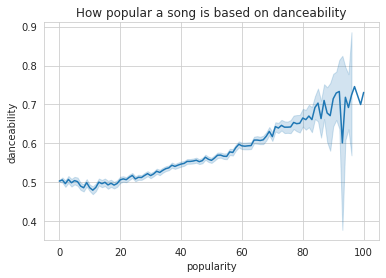

In [10]:
sns.lineplot(y='danceability', x = 'popularity', data = df)
plt.title('How popular a song is based on danceability')

Observation: there is a positive correlation between danceability and popularity of a song.

Text(0.5, 1.0, 'How popular a song is based on liveness')

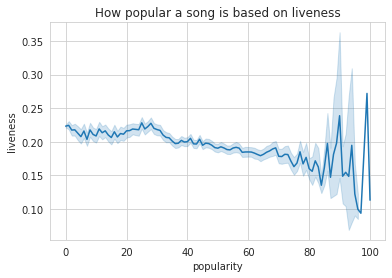

In [11]:
sns.lineplot(y='liveness', x = 'popularity', data = df)
plt.title('How popular a song is based on liveness')

Observation: There is a weak negative correlation between popularity and liveness. Liveness is the ratio of the track being instrumental. 

Text(0.5, 1.0, 'How popular a song is based on energy in the song')

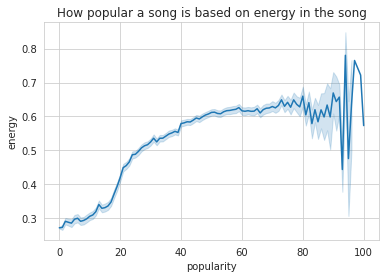

In [12]:
sns.lineplot(y='energy', x = 'popularity', data = df)
plt.title('How popular a song is based on energy in the song')

Observation: there is a strong correlation between energy of a song and popularity

Text(0.5, 1.0, 'How popular a song is based on whether there are explicit lyrics in the song')

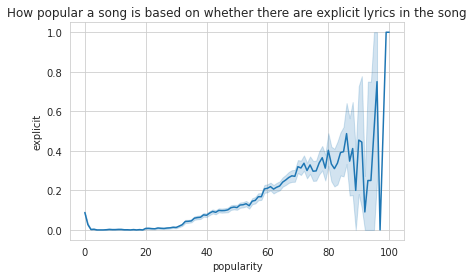

In [13]:
sns.lineplot(y='explicit', x = 'popularity', data = df)
plt.title('How popular a song is based on whether there are explicit lyrics in the song')

Observation: There is an low correlation between the popularity and explicitness of a song up until the top 20% of popular songs. The correlation for the last 20% increases quite a bit but the low correlation for >80% indicates that this correlation could be an anomoly and that there is no real correlation between these values.

Text(0.5, 1.0, 'How popular a song is based on its acousticness')

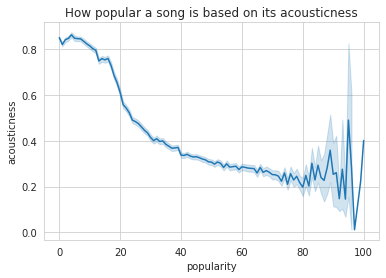

In [14]:
sns.lineplot(y='acousticness', x = 'popularity', data = df)
plt.title('How popular a song is based on its acousticness')

observation: strong negative correlation

Based on the above graphs, the most direct correlations in my opinion to popularity are: danceability and energy

In [15]:
def split_columns(data):
  categorical = data.select_dtypes(include=['object','category']).columns.tolist()
  numerical = data.select_dtypes(include=['int64','float64']).columns.tolist()
  return categorical, numerical

In [16]:
categorical,numerical = split_columns(df)
categorical

['artists', 'id', 'name', 'release_date']

Isolated the numerical data so analysis can be performed on it

In [17]:
numerical

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
dfModel = df[numerical]
from sklearn import preprocessing
min_max_scalar = preprocessing.MinMaxScaler()
x_scaled = min_max_scalar.fit_transform(dfModel)
dfModel = pd.DataFrame(x_scaled,columns = numerical)
dfModel

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,0.0,0.985944,0.282389,0.153112,0.211,0.0,0.878000,0.909091,0.6650,0.624916,1.0,0.04,0.037732,0.332450
1,0.9630,0.0,0.734940,0.828947,0.032496,0.341,0.0,0.000000,0.636364,0.1600,0.744797,1.0,0.05,0.427835,0.250243
2,0.0394,0.0,0.964859,0.331984,0.091685,0.166,0.0,0.913000,0.272727,0.1010,0.707071,1.0,0.05,0.034948,0.453125
3,0.1650,0.0,0.970884,0.278340,0.037954,0.309,0.0,0.000028,0.454545,0.3810,0.793736,1.0,0.03,0.036495,0.411113
4,0.2530,0.0,0.960843,0.423077,0.029932,0.193,0.0,0.000002,0.272727,0.2290,0.781521,1.0,0.02,0.039175,0.417503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,1.0,0.084940,0.795547,0.054943,0.808,0.0,0.000289,0.636364,0.0822,0.881654,1.0,0.72,0.090825,0.431318
170649,0.7340,1.0,0.206827,0.725709,0.026961,0.753,0.0,0.000000,0.636364,0.1010,0.845353,1.0,0.68,0.062371,0.566456
170650,0.6370,1.0,0.101406,0.641700,0.038191,0.858,0.0,0.000009,0.363636,0.2580,0.904769,0.0,0.76,0.083402,0.376531
170651,0.1950,1.0,0.010020,0.679150,0.061507,0.623,1.0,0.000008,0.181818,0.6430,0.827484,1.0,0.70,0.317526,0.308225


In [50]:
y_corr = dfModel.corr()
(y_corr['popularity']).sort_values(ascending=False)

popularity          1.000000
year                0.862442
energy              0.485005
loudness            0.457051
danceability        0.199606
explicit            0.191543
tempo               0.133310
duration_ms         0.059597
valence             0.014200
key                 0.007826
mode               -0.028897
liveness           -0.076464
speechiness        -0.171979
instrumentalness   -0.296750
acousticness       -0.573162
Name: popularity, dtype: float64

In [52]:
categorical,numerical = split_columns(df_artist)
categorical

['genres', 'artists']

In [54]:
numerical

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key',
 'mode',
 'count']

Regression Popularity prediction attempt: <br>
As you can see in the below matplot graph. the data everywhere and a prediction for popularity was not very accurate with none of the prediction even touching the most popular entries

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 

Imports for use later in the code

Verifying column contents

In [48]:
dfModel.head(5)

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,1921,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,1921,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,5,0.4150,60.936
2,0.0394,1921,0.961,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,5,0.0339,110.339
3,0.1650,1921,0.967,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,3,0.0354,100.109
4,0.2530,1921,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,2,0.0380,101.665


In [55]:
Y = dfModel['popularity']
X = dfModel.drop(columns=['popularity','mode','tempo','key'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state = 32)

Creating models and fitting data

In [58]:
dcr = DecisionTreeRegressor()
rf = RandomForestRegressor(max_depth = 15)
gb = GradientBoostingRegressor()
dcr.fit(X_train,y_train)
rf.fit(X_train,y_train)
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
dcr.score(X_test,y_test),rf.score(X_test,y_test),gb.score(X_test,y_test)

(0.6133023506132695, 0.8064390097321574, 0.7952565682995285)

In [62]:
y_prediction = rf.predict(X_test)
mean_sq_err = mean_squared_error(y_prediction,y_test)

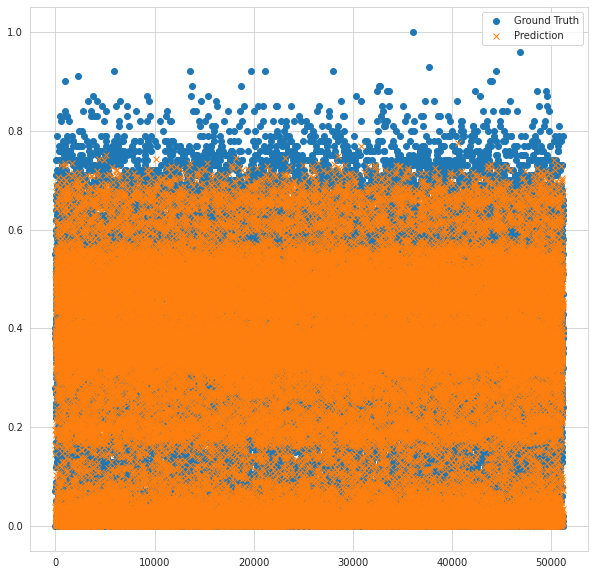

In [63]:
fig_dims = (10,10)
fig, ax = plt.subplots(figsize=fig_dims)
x=[]
for i in range(len(y_test)):
  x.append(i);
plt.plot(x, y_test,'o')
plt.plot(x, y_prediction, 'x')
plt.legend(['Ground Truth','Prediction'])

In [56]:
dcr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [65]:
Y = df['popularity']
X = df.drop(columns=['popularity','mode','tempo','key'])
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state = 53)

In [66]:
Y.head(5)

0    4
1    5
2    5
3    3
4    2
Name: popularity, dtype: int64

In [67]:
X.head(5)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,liveness,loudness,name,release_date,speechiness
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,0.665,-20.096,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",1921,0.0366
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,0.160,-12.441,Clancy Lowered the Boom,1921,0.4150
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,0.101,-14.850,Gati Bali,1921,0.0339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,0.381,-9.316,Danny Boy,1921,0.0354
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,0.229,-10.096,When Irish Eyes Are Smiling,1921,0.0380


In [68]:
df2 = df.sort_values(by=['popularity'],ascending = False)

In [69]:
df2[['name','year','artists']].head(10)

,name,year,artists
19611,Dakiti,2020,"['Bad Bunny', 'Jhay Cortez']"
19606,Mood (feat. iann dior),2020,"['24kGoldn', 'iann dior']"
19618,Dynamite,2020,['BTS']
19608,WAP (feat. Megan Thee Stallion),2020,"['Cardi B', 'Megan Thee Stallion']"
19610,positions,2020,['Ariana Grande']
19612,What You Know Bout Love,2020,['Pop Smoke']
19616,Blinding Lights,2020,['The Weeknd']
19607,For The Night (feat. Lil Baby & DaBaby),2020,"['Pop Smoke', 'Lil Baby', 'DaBaby']"
19615,Holy (feat. Chance The Rapper),2020,"['Justin Bieber', 'Chance the Rapper']"
19620,Lonely (with benny blanco),2020,"['Justin Bieber', 'benny blanco']"


It makes sense that the top 10 most popular songs are from 2020 as theyve been released during the highest population count ever

Find artists with the most songs/credits on spotify

In [70]:
df3 = df_artist.sort_values(by=['count'],ascending=False)
df3[['artists','count']].head(10)

,artists,count
8367,Francisco Canaro,3169
28561,Эрнест Хемингуэй,2422
28560,Эрих Мария Ремарк,2136
8434,Frank Sinatra,1459
10714,Ignacio Corsini,1256
27109,Vladimir Horowitz,1200
1682,Arturo Toscanini,1146
2707,Billie Holiday,1103
12378,Johnny Cash,1061
7426,Elvis Presley,1023


This was found as it may provide insight into the most popular artists, they may just post a lot more content than other artists

Is it possible to return other artist suggestions based on a given artist? e.g. If I like Kendrick Lamar, the system might return J.Cole as they are somewhat similar

In [71]:
df4 = df3[df3['count']>100]
df4 = df4.sort_values(by=['popularity','count'],ascending = False)
df4[['artists','popularity']].head(50)

,artists,popularity
12799,Juice WRLD,73.695652
19910,Post Malone,72.908257
27702,XXXTENTACION,70.658537
2025,Bad Bunny,70.209302
1557,Ariana Grande,68.698113
1971,BTS,68.448029
14570,Lil Baby,68.428571
18603,One Direction,67.747368
26380,Travis Scott,67.625899
26451,Trippie Redd,67.333333


In [96]:
dfRecommender = df_artist
dfRecommender = dfRecommender[dfRecommender['count']>50]
dfRecommender = dfRecommender[dfRecommender['popularity']>25]
array = dfRecommender['artists'].unique()
dfRecommender.head(5)

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
8,"['comedy rock', 'comic', 'parody']","""Weird Al"" Yankovic",0.173145,0.662787,218948.196721,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,1,122
13,"['dark trap', 'new orleans rap', 'underground ...",$uicideBoy$,0.141485,0.749344,146386.392000,0.635552,0.045675,0.202253,-6.631304,0.156108,115.022024,0.287286,61.800000,1,1,125
22,"['boy band', 'dance pop', 'europop', 'pop']",*NSYNC,0.191611,0.608743,236775.152381,0.694429,0.002703,0.202860,-6.273800,0.057138,115.615886,0.564781,45.371429,0,1,105
46,"['atl hip hop', 'gangster rap', 'hip hop', 'po...",2 Chainz,0.135493,0.749315,235681.519685,0.650291,0.000507,0.218785,-6.109748,0.222076,130.113772,0.496820,57.023622,1,1,127
62,"['atl hip hop', 'rap', 'trap']",21 Savage,0.131725,0.781764,215299.460674,0.553202,0.036787,0.173996,-7.367921,0.284043,125.437820,0.338211,67.011236,1,1,89


In [97]:
dfRecommender = dfRecommender.drop(columns=['genres'])

In [98]:
dfDouble = dfRecommender
dfRecommender = dfRecommender.drop(columns=['artists','key','mode','count','duration_ms','popularity'])
columns = dfRecommender.columns
scaler = MinMaxScaler().fit(dfRecommender)
dfRecommender = scaler.fit_transform(dfRecommender)
#dfRecommender = scaler.transfrom(dfRecommender)
dfRecommender = pd.DataFrame(dfRecommender,columns = columns)

In [100]:
from sklearn.metrics.pairwise import linear_kernel

In [101]:
cosine_similarity = linear_kernel(dfRecommender,dfRecommender)

In [102]:
indices = pd.Series(dfRecommender.index, index=dfDouble['artists']).drop_duplicates()

In [109]:
def recommendation_system(title, indices = indices,cosine_similarity = cosine_similarity,dfDouble = dfDouble):
  artistID = indices[title];
  artist_similarity = cosine_similarity[artistID]
  artist_score = list(enumerate(artist_similarity))
  artist_score = sorted(artist_score, key=lambda x:x[1],reverse=True)
  artist_score = artist_score[1:20]
  artist_similarity_index = [i[0] for i in artist_score]

  return dfDouble['artists'].iloc[artist_similarity_index];

In [117]:
recommendation_system('DaBaby')

10843      Insane Clown Posse
25925           Three 6 Mafia
17738                  N.W.A.
5500                   DaBaby
21516              Run–D.M.C.
24087               Tech N9ne
16831              Method Man
20021             Project Pat
16848    Mi Banda El Mexicano
15873                  Maluma
26614                     UGK
25292    The Notorious B.I.G.
19776                 Pitbull
19858                  Polo G
7481                   Eminem
6995                   Eazy-E
13440             Kevin Gates
1779               Atmosphere
3590             Busta Rhymes
Name: artists, dtype: object

As seen above, DaBaby returned a list of similar artists. DaBaby is regarded as a rapper and the system returned artists like Eminem, Easy-E, N.W.A and Kevin Gates all of whom I would say even have similar styles and the correlation between all of these artists can be heard in their music even outside the system.

To verify the correlation the recommender will also be ran on Eminem and Eazy-E to see if it matches them back to DaBaby

In [113]:
recommendation_system('Eminem')

10843      Insane Clown Posse
25925           Three 6 Mafia
17738                  N.W.A.
24087               Tech N9ne
16831              Method Man
25292    The Notorious B.I.G.
1779               Atmosphere
5500                   DaBaby
21516              Run–D.M.C.
6995                   Eazy-E
7481                   Eminem
17317               Mobb Deep
3590             Busta Rhymes
27667            Wu-Tang Clan
15873                  Maluma
19776                 Pitbull
20021             Project Pat
5478                      DMX
10691                Ice Cube
Name: artists, dtype: object

In [118]:
recommendation_system('Eazy-E')

10843      Insane Clown Posse
17738                  N.W.A.
25925           Three 6 Mafia
24087               Tech N9ne
6995                   Eazy-E
21516              Run–D.M.C.
16831              Method Man
19776                 Pitbull
1779               Atmosphere
25292    The Notorious B.I.G.
3590             Busta Rhymes
16848    Mi Banda El Mexicano
10691                Ice Cube
5500                   DaBaby
27667            Wu-Tang Clan
7481                   Eminem
6711                  Dr. Dre
15873                  Maluma
20021             Project Pat
Name: artists, dtype: object

As seen above the recommender system also matches back Eazy-E and Eminem to DaBaby verifying a correlation shown between them

In [120]:
recommendation_system('Elvis Presley')

12755           Juan Luis Guerra 4.40
2108                     Banda Machos
9240              Gilberto Santa Rosa
9681                  Grupo Laberinto
7225     El Gran Combo De Puerto Rico
26783               Valentín Elizalde
14958           Los Amables Del Norte
1433                  Antonio Aguilar
21277                    Romeo Santos
4168                  Chalino Sanchez
4661                      Chuck Berry
2670          Bill Haley & His Comets
27857                       Yomo Toro
24292             The Andrews Sisters
16848            Mi Banda El Mexicano
2094                  Banda El Recodo
9699                      Grupo Niche
9667               Grupo Exterminador
27538                    Willie Colón
Name: artists, dtype: object

Elvis Presley was ran through the recommendation system to show that the system doesnt just return the same types of artists all the time